In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn flask

Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.10.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached flask-3.1.0-py3-none-any.whl.metadata (2.7 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
Using cached matplotlib-3.10.1-cp312-cp312-win_amd64.whl (8.1 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl (11.1 MB)
Using cached flask-3.1.0-py3-none-any.whl (102 kB)
Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl (220 kB)
Using cached jinja2-3.1.6-py3-none-any.whl (134 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\shaik\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

# Load datasets
exercise_df = pd.read_csv('exercise.csv')
calories_df = pd.read_csv('calories.csv')

# Merge datasets
data = pd.merge(exercise_df, calories_df, on='User_ID')

# Check the first few rows
print(data.head())

# Check basic statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

    User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0  
            User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    1.247419e+07     28.000000    164.000000     63.000

In [4]:
# Drop missing values (if any)
data = data.dropna()

# Encode gender (male: 0, female: 1)
data['Gender'] = data['Gender'].map({'male': 0, 'female': 1})

# Drop User_ID (not useful for prediction)
data = data.drop(columns=['User_ID'])

# Check the preprocessed data
print(data.head())

   Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0       0   68   190.0    94.0      29.0       105.0       40.8     231.0
1       1   20   166.0    60.0      14.0        94.0       40.3      66.0
2       0   69   179.0    79.0       5.0        88.0       38.7      26.0
3       1   34   179.0    71.0      13.0       100.0       40.5      71.0
4       1   27   154.0    58.0      10.0        81.0       39.8      35.0


In [5]:
# Example: Create a BMI feature (if height and weight are available)
# data['BMI'] = data['Weight'] / (data['Height'] ** 2)

# Select features and target
X = data.drop(columns=['Calories'])
y = data['Calories']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred))
print("Linear Regression R²:", r2_score(y_test, y_pred))

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred))
print("Random Forest R²:", r2_score(y_test, y_pred))

Linear Regression MAE: 8.44151355384971
Linear Regression R²: 0.9672937151257295
Random Forest MAE: 1.7151600000000002
Random Forest R²: 0.9982322923338827


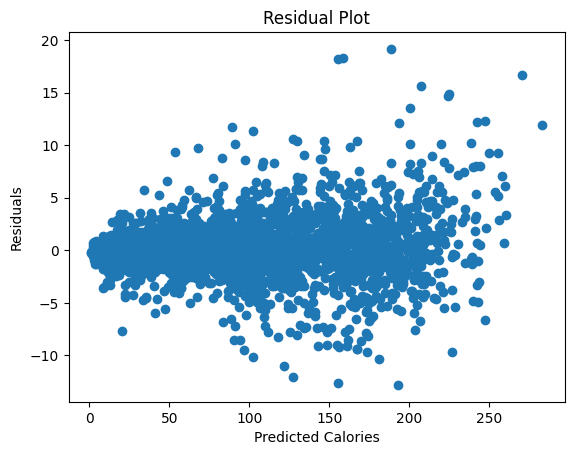

In [7]:
# Residual analysis
residuals = y_test - y_pred
import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Calories")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [8]:
from sklearn.model_selection import GridSearchCV

# Define a smaller parameter grid
param_grid = {
    'n_estimators': [100, 200],  # Fewer options
    'max_depth': [None, 10],      # Fewer options
    'min_samples_split': [2, 5]   # Fewer options
}

# Grid search with parallel processing
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1  # Use all CPU cores
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the optimized model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Optimized Random Forest MAE:", mean_absolute_error(y_test, y_pred))
print("Optimized Random Forest R²:", r2_score(y_test, y_pred))

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Optimized Random Forest MAE: 1.686655
Optimized Random Forest R²: 0.9982633448116194


In [9]:
import joblib

# Save the model
joblib.dump(best_model, 'calories_model.pkl')

# Load the model (for deployment)
# loaded_model = joblib.load('calories_model.pkl')

['calories_model.pkl']